In [105]:
#importing necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [9]:
# pd.read .csvfile()
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/HealthCareData.csv")  # or pd.read_excel(), pd.read_json(), etc.


In [10]:
# Handling missing values
df.shape

(950, 42)

In [11]:
df.isnull().sum()


,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [12]:
# Handling categorical values
import numpy as np

# Use the built-in 'object' instead of the deprecated np.object
categorical_features = df.select_dtypes(include=object)

categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

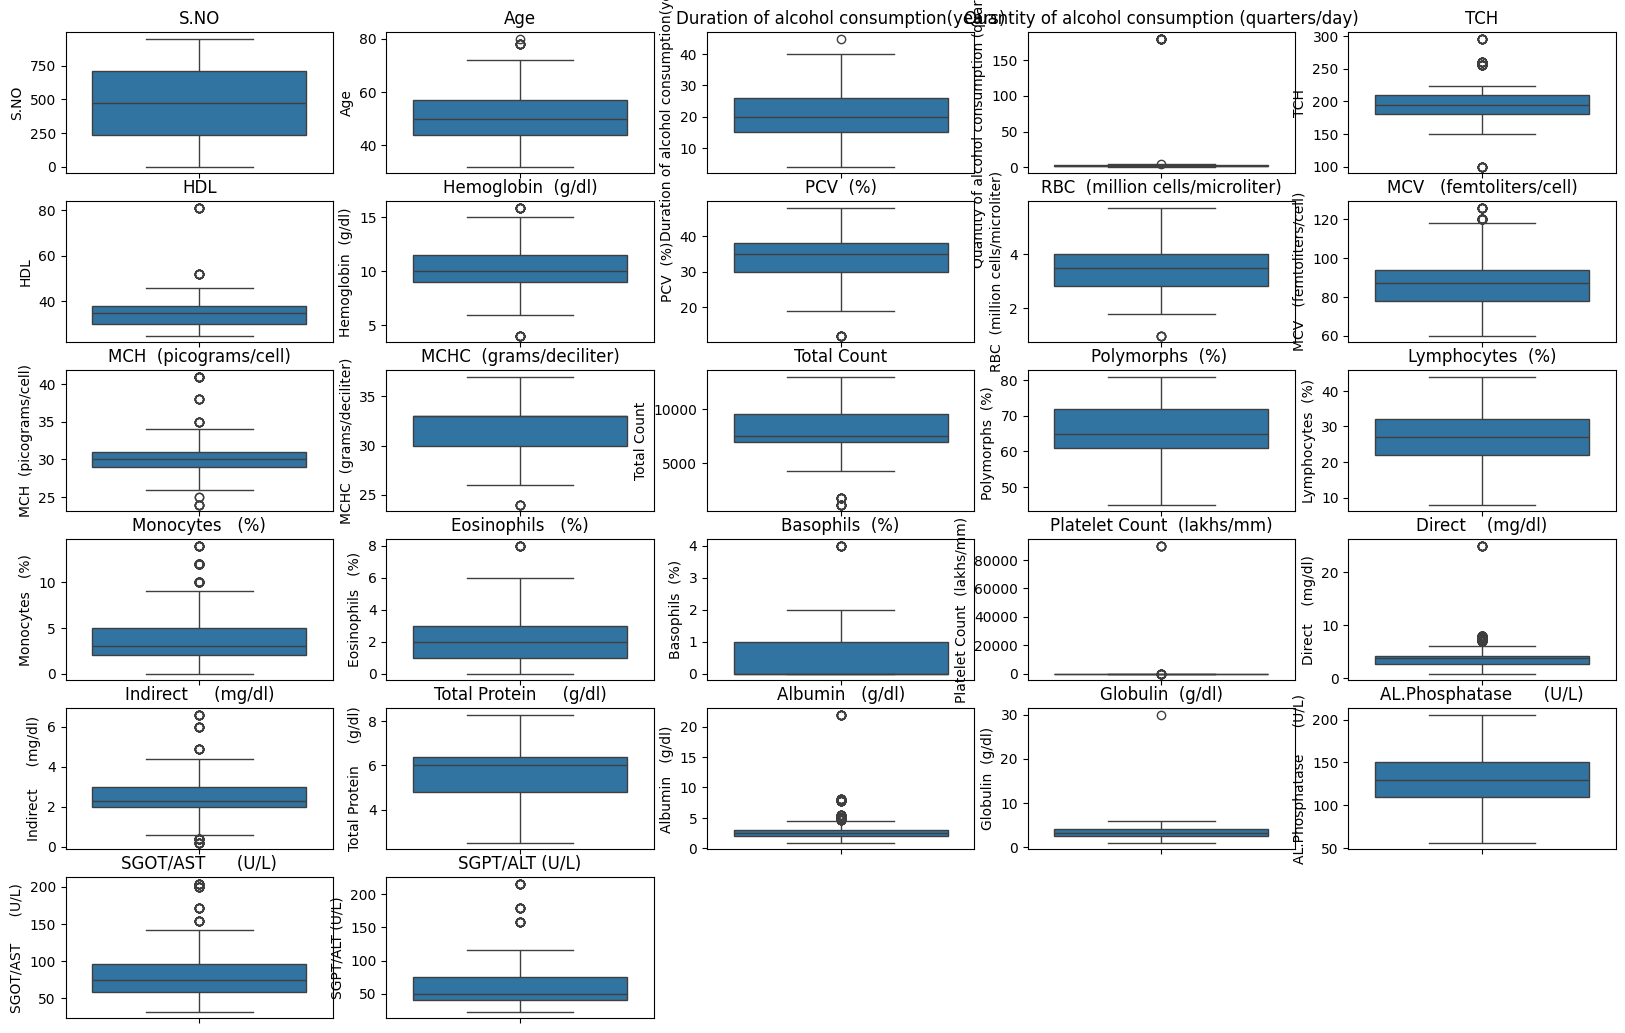

In [13]:
#Handling Outliers in Data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is already loaded from the previous cell
# df = pd.read_csv("/content/drive/MyDrive/HealthCareData.csv")

c=0

plt.figure(figsize=(20,15))

for i in df.columns:
    # Access the first element by integer position using .iloc[0]
    if type(df[i].iloc[0])!=str:
        plt.subplot(7,5,c+1)
        sns.boxplot(df[i])
        plt.title(i)
        c+=1

plt.show()

In [14]:
# Descriptive statistics
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.498557,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.712546,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


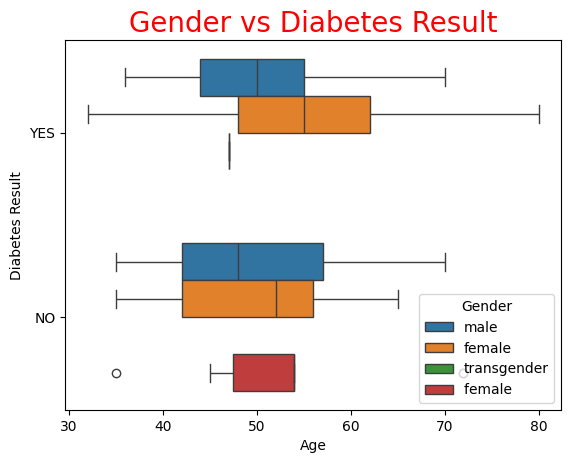

In [15]:
#2 : Visual analysis
   #2.1: Univariate analysis

sns.boxplot(x='Age', y='Diabetes Result', data=df, hue='Gender')
plt.title('Gender vs Diabetes Result', color='red', size=20)
plt.show()

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

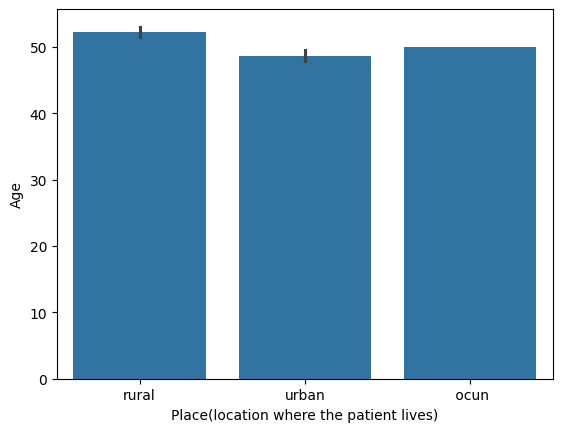

In [106]:


sns.barplot(x=df['Place(location where the patient lives)'], y=df['Age'])



Text(0.5, 1.0, 'Place vs Age')

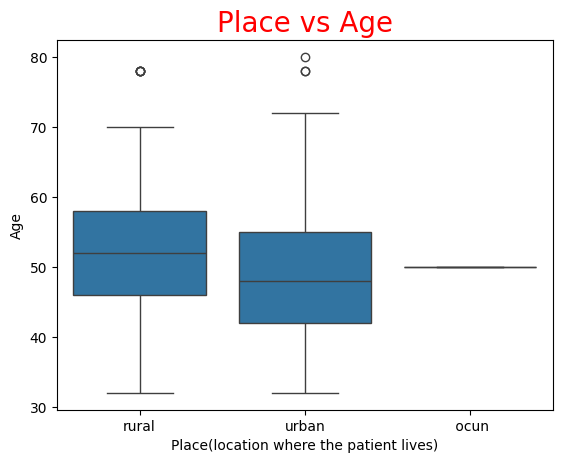

In [17]:
sns.boxplot(x='Place(location where the patient lives)', y='Age', data=df)

plt.title('Place vs Age', color='red', size=20)

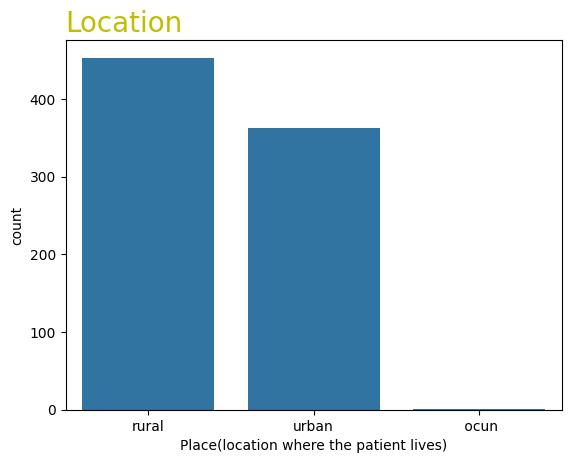

In [18]:
sns.countplot(data=df,x='Place(location where the patient lives)')

plt.title("Location", color='y', size=20, loc='left')

plt.show()

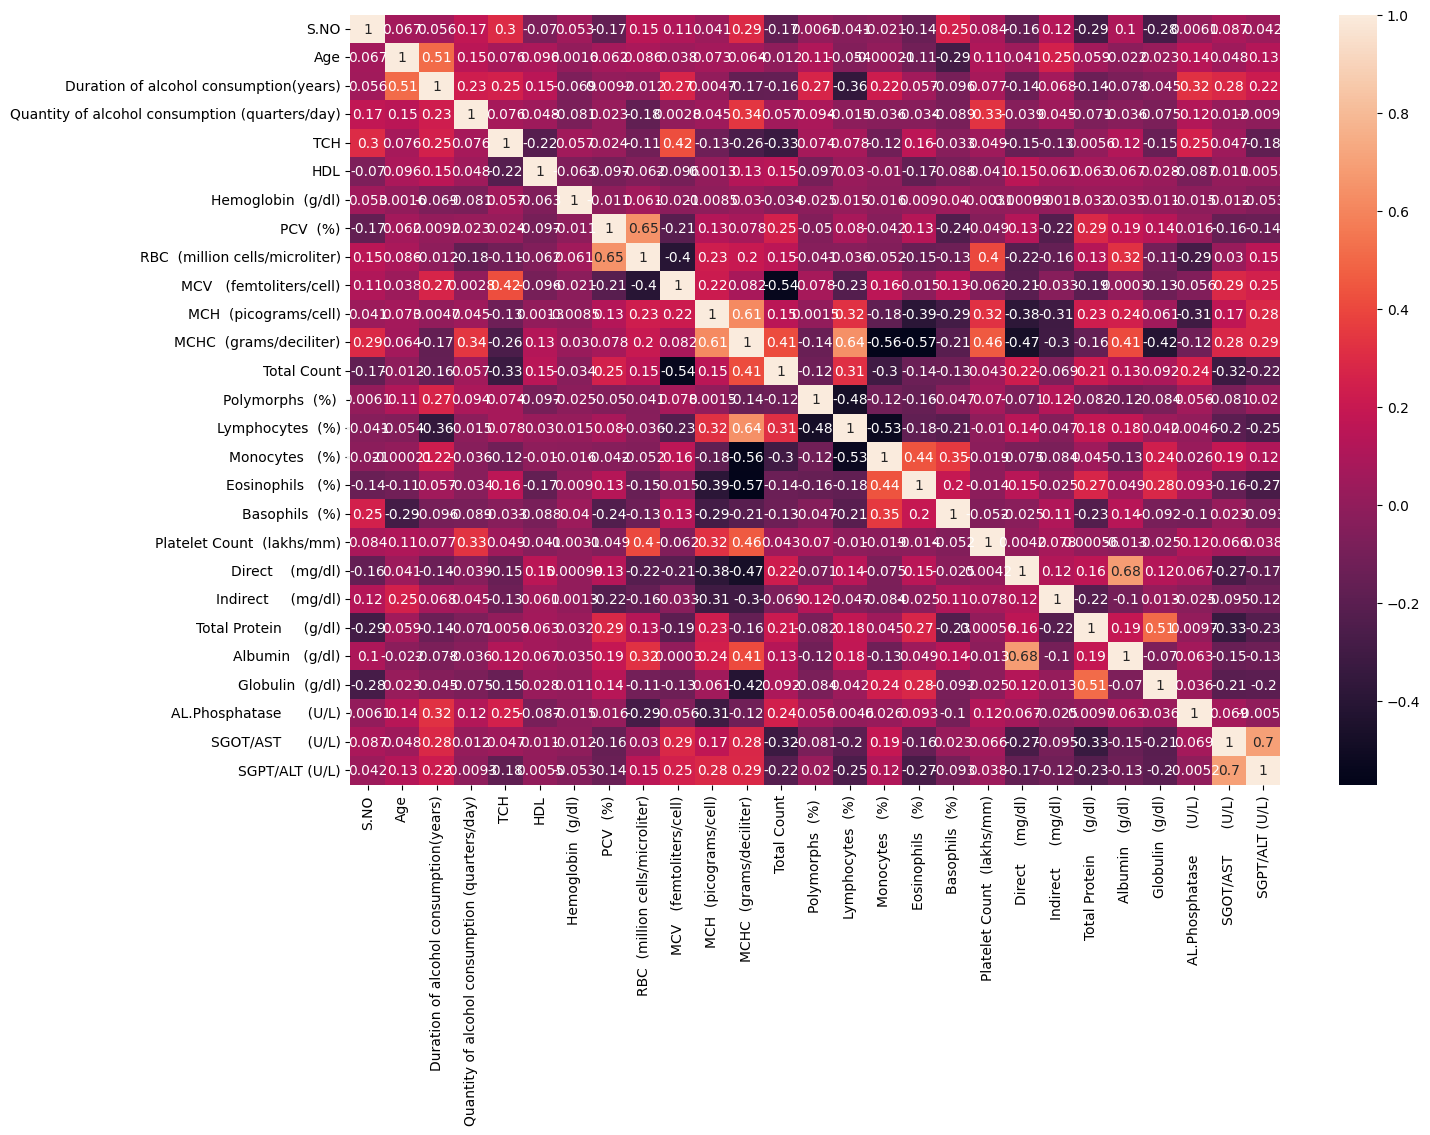

In [19]:
#2.3: Multivariate analysis

numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(15,10))
# Calculate and display the heatmap for the numeric columns
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

In [66]:
#Navie bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train_imputed, y_train)

GaussianNB()

In [67]:
# Randomforest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train_imputed,y_train)

RandomForestClassifier()

In [68]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

logistic = log.fit(x_train_scaled,y_train)

y_pred_lr = logistic.predict(x_test_scaled)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
[[ 34  21]
 [ 12 123]]
              precision    recall  f1-score   support

          NO       0.74      0.62      0.67        55
         YES       0.85      0.91      0.88       135

    accuracy                           0.83       190
   macro avg       0.80      0.76      0.78       190
weighted avg       0.82      0.83      0.82       190



In [69]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [70]:
print ("x Train",x_train)

print("y_Train",y_train)

x Train      S.NO  Age  Duration of alcohol consumption(years)  \
936   937   72                                       4   
290   291   52                                      12   
544   545   38                                      24   
275   276   60                                      10   
109   110   50                                      15   
..    ...  ...                                     ...   
106   107   54                                      20   
270   271   60                                      10   
860   861   57                                      25   
435   436   55                                      20   
102   103   52                                      20   

     Quantity of alcohol consumption (quarters/day)    TCH   HDL  \
936                                               3    NaN   NaN   
290                                               1  180.0  35.0   
544                                               3    NaN   NaN   
275                    

In [111]:
#RandomizedSearchCV

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np

k = np.random.randint(1,40,70)

params = {'n_neighbors': k}

random_search = RandomizedSearchCV(knn, params,n_iter=6,cv=2,n_jobs=-1, verbose=0)

random_search.fit(x_train_scaled,y_train)


RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(), n_iter=6, n_jobs=-1,
                   param_distributions={'n_neighbors': array([34, 10, 34, 16,  1, 30, 10,  5,  4, 11, 15, 24, 14,  1, 11, 13,  9,
       28, 32,  1,  5,  1, 17,  6, 29, 37,  6, 35, 15, 18,  5, 24,  6, 28,
       31, 35,  7, 39, 20, 16, 25, 21, 24, 39, 31, 20, 38, 21, 13, 25, 13,
        6,  9, 18,  8,  9,  5, 23, 21, 23, 24,  7, 16,  6,  4, 32, 39,  8,
        9, 29])})

In [112]:

print('train_score - ' + str(random_search.score(x_train_scaled,y_train)))
print('test_score - ' + str(random_search.score(x_test_scaled,y_test)))

train_score - 0.9157894736842105
test_score - 0.8789473684210526


In [ ]:
Result

In [72]:
# Assuming 'Diabetes Result' is your target variable and the rest are features
# You might need to adjust the features you select based on your specific model
y = df['Diabetes Result']
x = df.drop('Diabetes Result', axis=1)

# Ensure 'x' contains only numerical features if your model requires it
# You might need to handle categorical features through encoding (e.g., one-hot encoding)
# For this example, we'll select only numerical columns for 'x'
x = x.select_dtypes(include=np.number)


from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train

x_test

y_train

y_test

,Diabetes Result
199,YES
929,NO
693,YES
798,YES
874,YES
...,...
598,NO
33,YES
31,YES
710,YES
